# Daily Coronavirus Cases Forecasting Using LSTM With Keras

This notebook is a demonstration of how you would use Recurrent Neural Networks for some real-world time series data with Keras.

Please refer to the below repository to download the dataset:

This is the data repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). Also, Supported by ESRI Living Atlas Team and the Johns Hopkins University Applied Physics Lab (JHU APL).
https://github.com/CSSEGISandData/COVID-19

In the following, we will be working on the confirmed cases and not the recovered/death cases.

### Importing the libraries

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

### Reading and processing the dataset

In [5]:
#Make sure to change the path
dataset = pd.read_csv('../../data/time_series_19-covid-Confirmed.csv')

In [8]:
dataset.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20'],
      dtype='object')

It can be seen that when I worked on this notebook, the dataset includes cases from 22/1/20 to 11/3/20. You may have more data since the dataset is updated regularly.

We are not interested in the first four columns.

In [9]:
dataset=dataset.iloc[:,4:]

In [10]:
dataset.columns

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20'],
      dtype='object')

In [12]:
dataset.head(20)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
0,2,3,5,7,8,8,14,14,14,19,...,43,43,43,47,48,50,50,50,53,59
1,2,1,2,2,4,4,7,7,11,15,...,274,293,331,360,420,461,502,511,581,639
2,0,1,3,3,4,5,7,7,10,13,...,108,110,110,117,130,138,150,150,160,178
3,0,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,3,4,4,4,7,8,8,...,29,36,50,50,83,93,99,117,129,149
5,0,0,0,0,0,0,1,1,1,1,...,8,9,12,13,21,21,27,32,32,39
6,0,0,0,0,3,4,4,4,4,4,...,6,13,22,22,26,28,38,48,55,65
7,0,0,0,0,1,1,1,1,2,3,...,9,9,10,10,10,11,11,15,18,21
8,0,0,0,0,0,0,0,1,3,2,...,9,11,11,13,13,13,15,15,18,20
9,0,0,0,0,0,1,1,1,1,1,...,1,1,1,1,1,1,2,2,2,3


By summing up all rows, we get the cumulative daily cases:

In [14]:
cum_daily_cases = dataset.sum(axis=0)
cum_daily_cases.index = pd.to_datetime(cum_daily_cases.index)
cum_daily_cases.head(20)

2020-01-22      555
2020-01-23      653
2020-01-24      941
2020-01-25     1434
2020-01-26     2118
2020-01-27     2927
2020-01-28     5578
2020-01-29     6166
2020-01-30     8234
2020-01-31     9927
2020-02-01    12038
2020-02-02    16787
2020-02-03    19881
2020-02-04    23892
2020-02-05    27635
2020-02-06    30817
2020-02-07    34391
2020-02-08    37120
2020-02-09    40150
2020-02-10    42762
dtype: int64

Text(0.5, 1.0, 'Cumulative daily cases')

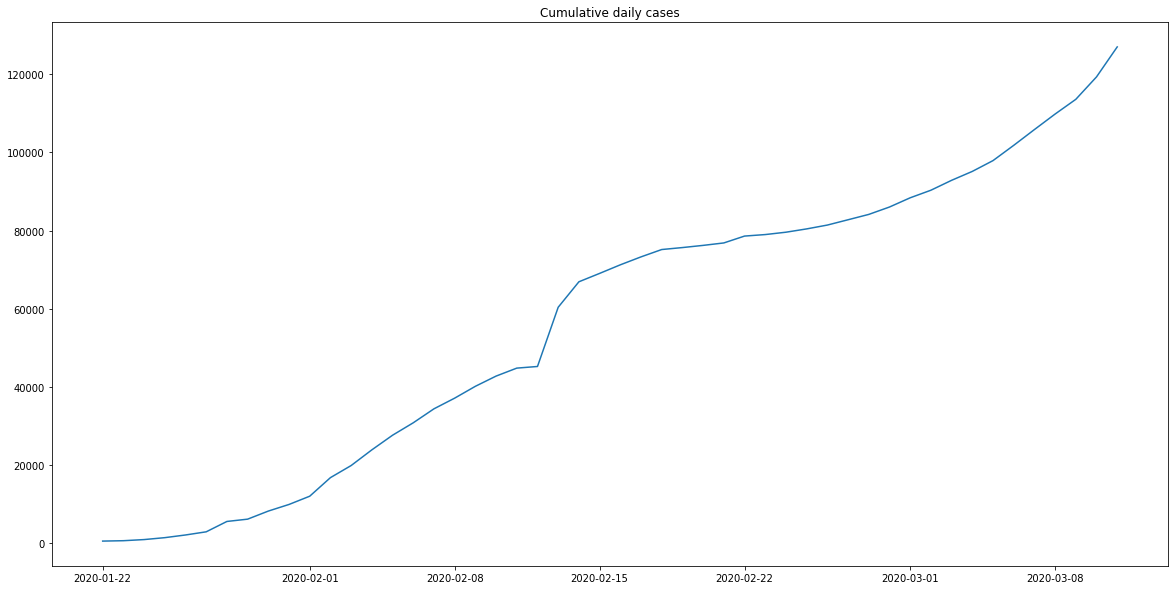

In [18]:
plt.plot(cum_daily_cases)
plt.rcParams["figure.figsize"] = (30,30)
plt.title("Cumulative daily cases")

We' ll reverse the accumulation by subtracting the present value from the previous one.

In [21]:
daily_cases = cum_daily_cases.diff().fillna(cum_daily_cases[0]).astype(np.int64)
daily_cases.head(20)

2020-01-22     555
2020-01-23      98
2020-01-24     288
2020-01-25     493
2020-01-26     684
2020-01-27     809
2020-01-28    2651
2020-01-29     588
2020-01-30    2068
2020-01-31    1693
2020-02-01    2111
2020-02-02    4749
2020-02-03    3094
2020-02-04    4011
2020-02-05    3743
2020-02-06    3182
2020-02-07    3574
2020-02-08    2729
2020-02-09    3030
2020-02-10    2612
dtype: int64

Text(0.5, 1.0, 'daily cases')

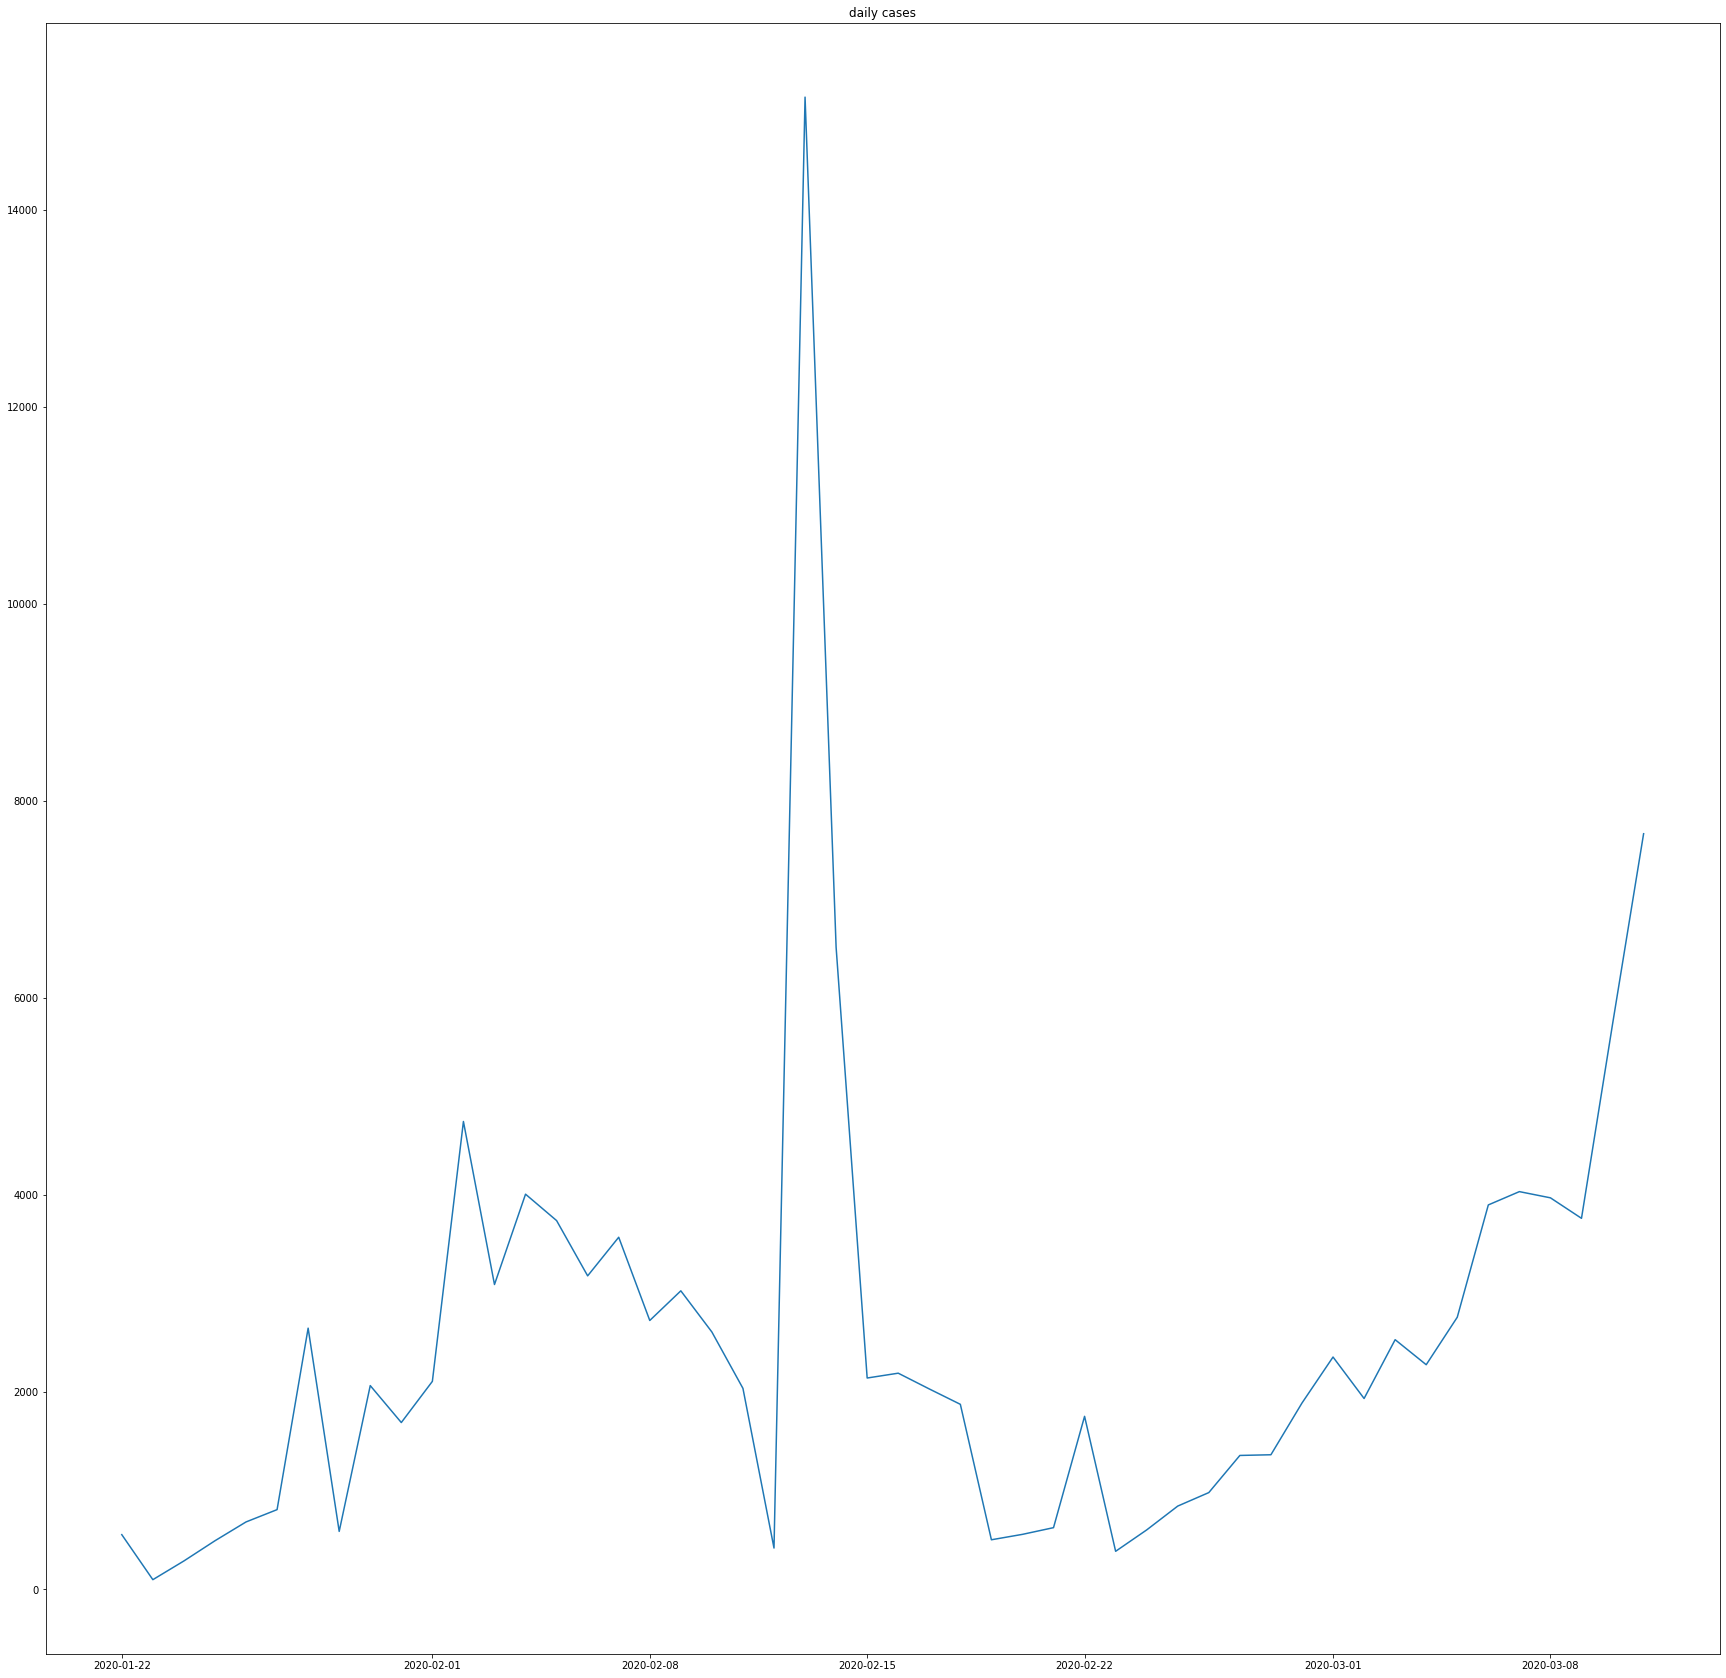

In [22]:
plt.plot(daily_cases)
plt.title("daily cases")

According to [1], The huge spike (in the middle) is mostly due to a change of criteria for testing patients in China. 

In [25]:
#amount of data
daily_cases.shape

(50,)

We will assign the first 35 days for training and use the remainder for testing:

### Splitting the data

In [26]:
training_set = daily_cases[:-15]
testing_set = daily_cases[-15:]

In [27]:
training_set.shape

(35,)

In [28]:
testing_set.shape

(15,)

### Feature Scaling


In [30]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))

training_set_scaled=sc.fit_transform(np.expand_dims(training_set, axis=1))
testing_set_scaled=sc.transform(np.expand_dims(testing_set, axis=1))

In [32]:
print(training_set_scaled)

[[0.03036747]
 [0.        ]
 [0.01262542]
 [0.02624759]
 [0.03893946]
 [0.04724566]
 [0.16964582]
 [0.0325603 ]
 [0.13090571]
 [0.10598711]
 [0.13376304]
 [0.30905708]
 [0.199083  ]
 [0.26001728]
 [0.24220878]
 [0.20493056]
 [0.2309788 ]
 [0.17482889]
 [0.19483022]
 [0.16705429]
 [0.12904512]
 [0.02133032]
 [1.        ]
 [0.42653997]
 [0.13602233]
 [0.13927836]
 [0.12864642]
 [0.11828028]
 [0.02691209]
 [0.03056682]
 [0.03508539]
 [0.11017343]
 [0.01913748]
 [0.03355705]
 [0.04963785]]


In [33]:
print(testing_set_scaled)

[[0.05874144]
 [0.08379294]
 [0.08425809]
 [0.11914413]
 [0.15017609]
 [0.12220081]
 [0.16187122]
 [0.14499302]
 [0.17702173]
 [0.25277427]
 [0.26174497]
 [0.25755864]
 [0.24373713]
 [0.37470928]
 [0.50315636]]


Creating a data structure with 5 timesteps and 1 output at each time t the RNN will look at the 5 timesteps before time t (past information) RNN will try to learn and understand correlation in the past information

In [87]:
#Input of the NN, will contain the 5 previous days before a current day
X_train=[]
# Will contain the number of cases the next day
y_train=[]

In [88]:
for i in range(5, 35):
    X_train.append(training_set_scaled[i-5:i,0])
    y_train.append(training_set_scaled[i,0]) #Ground truth
X_train, y_train = np.array(X_train), np.array(y_train)  

In [89]:
X_train.shape

(30, 5)

In [90]:
y_train.shape

(30,)

In [91]:
#Reshaping X_train
X_train=np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [92]:
X_train.shape

(30, 5, 1)

### Building and training the RNN

In [93]:
#Remember this is a regression problem
regressor=Sequential()
#First LSTM layer with 50 neurons
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
#Second LSTM layer with 50 neurons
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
#Third LSTM layer with 50 neurons
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
#fourth LSTM layer with 50 neurons
regressor.add(LSTM(units=50,return_sequences=False))
regressor.add(Dropout(0.2))
#Note that dropout is used for regularization
#Adding the output layer
#The output layer is a fully connected layer, fully connected to the previous LSTM layer
#Dimension of the output layer is equal to 1
regressor.add(Dense(units=1))

#Compiling the RNN
#we are doing regression so we use mean squared error as a loss function and not binary cross entropy
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [94]:
# Fitting the RNN to the Training set
regressor.fit(X_train,y_train,epochs=100,batch_size=5)

Train on 30 samples
Epoch 1/100
30/30 [==============================] - 1s 47ms/sample - loss: 0.0514
Epoch 2/100
30/30 [==============================] - 0s 2ms/sample - loss: 0.0340
Epoch 3/100
30/30 [==============================] - 0s 2ms/sample - loss: 0.0334
Epoch 4/100
30/30 [==============================] - 0s 2ms/sample - loss: 0.0322
Epoch 5/100
30/30 [==============================] - 0s 2ms/sample - loss: 0.0335
Epoch 6/100
30/30 [==============================] - 0s 2ms/sample - loss: 0.0322
Epoch 7/100
30/30 [==============================] - 0s 2ms/sample - loss: 0.0331
Epoch 8/100
30/30 [==============================] - 0s 2ms/sample - loss: 0.0341
Epoch 9/100
30/30 [==============================] - 0s 2ms/sample - loss: 0.0325
Epoch 10/100
30/30 [==============================] - 0s 2ms/sample - loss: 0.0325
Epoch 11/100
30/30 [==============================] - 0s 2ms/sample - loss: 0.0321
Epoch 12/100
30/30 [==============================] - 0s 2ms/sample - loss:

### Making the predictions and visualising the results

In [95]:
dataset_total = pd.concat((pd.Series(training_set_scaled.flatten()),
                               pd.Series(testing_set_scaled.flatten())),axis=0)            
inputs=dataset_total[len(dataset_total)-len(testing_set_scaled)-5:].values

In [96]:
inputs.shape

(20,)

In [97]:
inputs=inputs.reshape(-1,1)

In [98]:
inputs.shape

(20, 1)

In [99]:
X_test=[]

#We take the 5 previous days also so total is 20
for i in range(5, 20):
    X_test.append(inputs[i-5:i,0])
X_test = np.array(X_test)
X_test=np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
X_test.shape

(15, 5, 1)

In [100]:
#Prediction
predicted_covid_cases = regressor.predict(X_test)
#Get original scale of the scaled values
predicted_covid_cases = sc.inverse_transform(predicted_covid_cases)


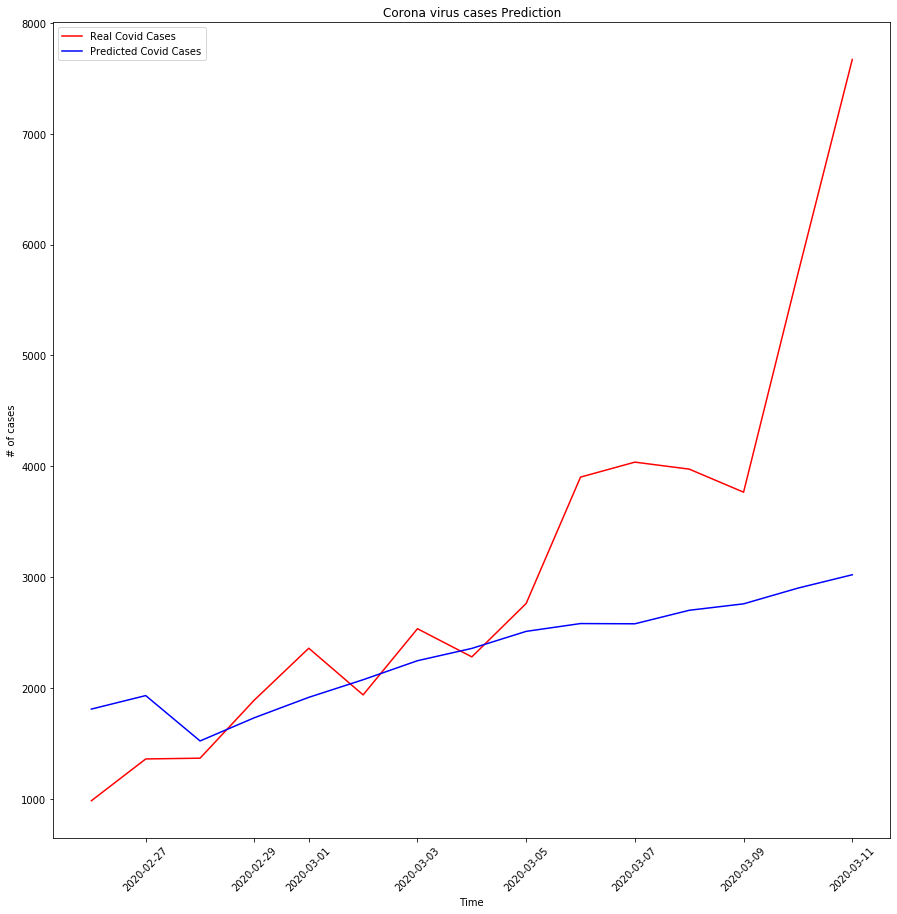

In [106]:
#visualising the results
plt.plot(testing_set.index,testing_set.values, color = 'red',label='Real Covid Cases')
plt.plot(testing_set.index,predicted_covid_cases, color = 'blue',label='Predicted Covid Cases')

plt.title('Corona virus cases Prediction')
plt.xlabel('Time')
plt.xticks(rotation=45)
plt.ylabel('# of cases')
plt.legend()
plt.rcParams["figure.figsize"] = (15,15)
plt.show()

As expected, the prediction of our model is not realistic, because we have been using the last five days to predict the number of cases, which is not how the number of cases is actually predicted. Nonetheless, the main goal is to provide insight into how to use LSTM for time series forecasting.

In [103]:
# CALCULATE RMSE (Root mean squared error)
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(testing_set.values, predicted_covid_cases))
print(rmse)

1583.2218885206055


The problem of predicting Covid-19 cases every day is a complicated one. Many factors play a major role in the spread of the virus and the number of people infected. Hope everything is going to be back to normal soon.

### References
[1] Thanks to Venelin Valkov for his amazing tutorial in https://www.curiousily.com/posts/time-series-forecasting-with-lstm-for-daily-coronavirus-cases/ 